In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
%matplotlib inline

In [183]:
# Grab and process the raw data.
data_path = 'C:/Users/willd/Desktop/sentances/yelp_labelled.txt'
            
df = pd.read_csv(data_path, delimiter= '\t', header=None)
df.columns = ['review', 'positive']

## Classification Model
### Build a model using yelp reviews

In [184]:
df.head()

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [185]:
# the punctuation is difficult to capture reviews that end positively
df['review'] = df['review'].str.replace('.', ' ')
df.head()

,review,positive
0,Wow Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [186]:
#choose keywords as features for positive
keywords = ['great', 
            'love', 
            'mother',
            'top',
            'away',
            'amazing',
            'prompt',
            'delicious',
            'best',
            'beautiful',
            'wow', 
            'wonderful',
            'good',
            'reasonably',
            'value',
            'works',
            'well',
            'quickly',
            'satisfied',
            'fast',
            'happy',
            'comfort',
            'nice',
            'pleased',
            'perfect',
            'impressed',
            'excellent',
            'fantastic',
            'durable',
            'recommend',
            'brilliant',
            'enjoyed',
            'liked',
            'to die for']

#Capture both the word, plus if its in a pattern


for key in keywords:
    df[str(key)] = df.review.str.contains(
        '' + str(key) + '',
        case=False
    )

In [187]:
#turn binary 'positive' to boolean T/F
df['positive'] = (df['positive'] == 1)

In [188]:
df.head(1)

,review,positive,great,love,mother,top,away,amazing,prompt,delicious,...,perfect,impressed,excellent,fantastic,durable,recommend,brilliant,enjoyed,liked,to die for
0,Wow Loved this place,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


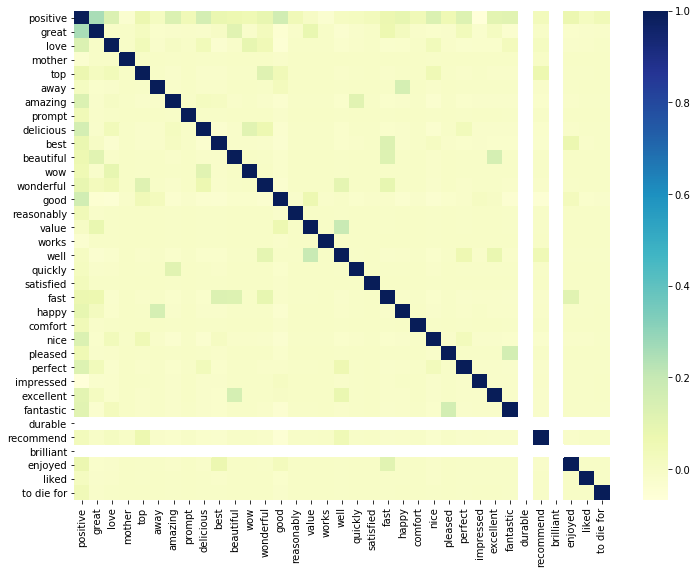

In [189]:
#Creat heatmap for correlation
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), cmap='YlGnBu')
plt.show()

Most of the variables seem to be independent. Some small correlations but enough independence

In [190]:
#check instances of features
for col in df.loc[:,'great':'to die for']:
    df1=pd.DataFrame(columns=df.columns)
    for col in df1.loc[:,'great':'to die for']:
        df1[col]= df[col].value_counts()
    
df1.head()

,review,positive,great,love,mother,top,away,amazing,prompt,delicious,...,perfect,impressed,excellent,fantastic,durable,recommend,brilliant,enjoyed,liked,to die for
False,NaN,NaN,935,964,999,991,995,976,998,976,...,985,992,990,988,1000.0,982,1000.0,995,997,998
True,NaN,NaN,65,36,1,9,5,24,2,24,...,15,8,10,12,NaN,18,NaN,5,3,2


In [191]:
data = df[keywords]
target = df['positive']

In [192]:
#As the outcome is categorical we use naive bayes to fit the model. More specifically,
#the out come is binary so we choose the Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 245


After compiling the list of keywords, the model can predict at around 75%

# Evaluating the model

In [193]:
#Success rate
srate = 100-(245/1000*100)
print('Accuracy of the model:{}%'.format(srate))

Accuracy of the model:75.5%


[[457  43]
 [202 298]]


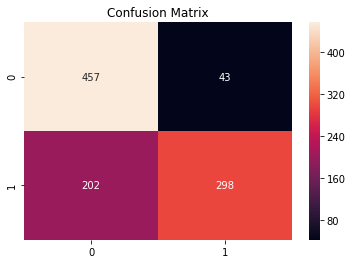

500


In [194]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target, y_pred))

g = sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
print(len(df.loc[df['positive']==True]))

Of 245 the mislabelled points:

43 of them were reviews that the model identified as positive, but were negative. Type 1 error or false positive

202 of the reviews were false negatives, in otherwords, the model failed to indentify these of positive reviews

In [195]:
#Sensitivity:
sens = (298/500)
spef = (457/500)
print('Sensitivity = {0:.2f}%'.format(sens*100))
print('Specificity = {0:.2f}%'.format(spef*100))

Sensitivity = 59.60%
Specificity = 91.40%


In [196]:
#Examine Type I and Type II errors to ameliorate the success rate
df['y_pred'] = y_pred
errors = df[['review','y_pred','positive']]
type1 = errors.loc[(errors['y_pred']==True)&(errors['positive']==False)]
type2 = errors.loc[(errors['y_pred']==False)&(errors['positive']==True)]

In [197]:
#Look at the false positives
type1.head(25)

,review,y_pred,positive
1,Crust is not good,True,False
33,seems like a good quick place to grab a bite o...,True,False
41,There is not a deal good enough that would dra...,True,False
42,Hard to judge whether these sides were good be...,True,False
79,There is so much good food in Vegas that I fee...,True,False
98,It was not good,True,False
110,"REAL sushi lovers, let's be honest - Yama is n...",True,False
138,"He was extremely rude and really, there are so...",True,False
167,So don't go there if you are looking for good ...,True,False
194,I'm not really sure how Joey's was voted best ...,True,False


Phrases like "instead of nice", "arent as good", "i do love, but" etc. creates problems for this kinds of model.
Any sort of negation to positive sentiment it flagged as positive.

In [198]:
#Take a look at the false negatives.
type2.head(25)

,review,y_pred,positive
13,"I tried the Cape Cod ravoli, chicken,with cran...",False,True
16,Highly recommended,False,True
22,Service is also cute,False,True
24,So they performed,False,True
30,"Also there are combos like a burger, fries, an...",False,True
32,I found this place by accident and I could not...,False,True
34,"Overall, I like this place a lot",False,True
35,The only redeeming quality of the restaurant w...,False,True
38,My first visit to Hiro was a delight!,False,True
40,The shrimp tender and moist,False,True


Examining the false negatives could help in improving the models performance. Some new features can be added based on this case.

# Cross Validation

In [199]:
#Write a function to do the cross validation 
# Create n folds
def crossv (df):
    fold1, fold2, fold3, fold4, fold5 = np.array_split(df, 5)
    folds = [fold1, fold2, fold3, fold4, fold5]
    scores = []    
    for i in range(len(folds)):
        allfolds = [fold1, fold2, fold3, fold4, fold5]            
        fold = folds[i]
        test = pd.DataFrame(fold)
        trainFolds = allfolds.pop(i)
        train = pd.concat([trainFolds])
        data = train[keywords]
        data2 = test[keywords]
        target = train['positive']
        bnb.fit(data, target)
        y_pred = bnb.predict(data2)        
        scores.append(1-((test['positive'] != y_pred).sum())/data2.shape[0])
    scores = np.array(scores)        
    print ('Accuracy per fold:{}'.format(scores))
    print('Mean Accuracy and std: {0:.2f}% , {1:.2f}%'.format((scores.mean()*100),(scores.std()*100)))
     



In [200]:
crossv(df)

Accuracy per fold:[0.75  0.775 0.77  0.685 0.835]
Mean Accuracy and std: 76.30% , 4.82%


In [201]:
crossv(df)

Accuracy per fold:[0.75  0.775 0.77  0.685 0.835]
Mean Accuracy and std: 76.30% , 4.82%


In [202]:
#Compare to sklearns built in function
from sklearn.model_selection import cross_val_score
cv = cross_val_score(bnb, data, target, cv=10)

print ('Accuracy per fold:{}'.format(cv.round(2)))
print('Mean Accuracy and std: {0:.2f}% , {1:.2f}%'.format((cv.mean()*100),(cv.std()*100)))


Accuracy per fold:[0.71 0.78 0.72 0.81 0.77 0.71 0.77 0.71 0.74 0.78]
Mean Accuracy and std: 75.00% , 3.46%


A few things to note about the cross validation. When the model was tested against the full data set, it had an accuracy of 76%%, the average accuracy for the 5 folds was 76.3% and the accuracy for 10 folds was 75%. 

## IMDB reviews

In [203]:
# Grab and process the raw data.
imdb_path = 'C:/Users/willd/Desktop/sentances/imdb_labelled.txt'
            
imdb = pd.read_csv(imdb_path, delimiter= '\t', header=None)
imdb.columns = ['review', 'positive']
imdb['review'] = imdb['review'].str.replace('.', ' ')

imdb['positive'] = (imdb['positive'] == 1)


In [204]:
for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(
        '' + str(key) + '',
        case=False
    )

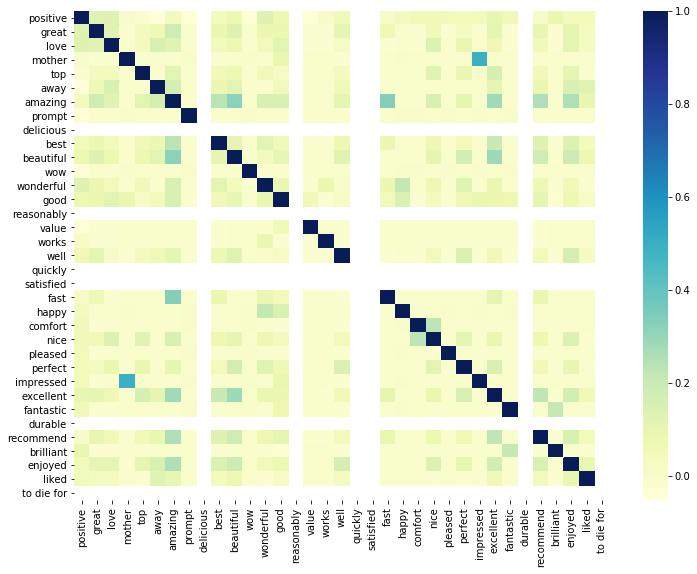

In [205]:
#Creat heatmap for correlation
plt.figure(figsize=(12,9))
sns.heatmap(imdb.corr(), cmap='YlGnBu')
plt.show()

The heatmap show some highly correlated variable, particularly 'mother' and 'impressed'. We will leave it how it is for the moment

In [206]:
data = imdb[keywords]
target = imdb['positive']

In [207]:
bnb.fit(data,target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 748 points : 250


### Cross Validation

In [208]:
crossv(imdb)

Accuracy per fold:[0.68       0.71333333 0.76       0.67785235 0.68456376]
Mean Accuracy and std: 70.31% , 3.12%


## Amazon product reviews

In [209]:
az_path = 'C:/Users/willd/Desktop/sentances/amazon_cells_labelled.txt'

azprod = pd.read_csv(az_path, delimiter='\t', header=None)
azprod.columns = ['review','positive']
azprod['review'] = azprod['review'].str.replace('.', ' ')
azprod['positive'] = (azprod['positive'] == 1)
azprod.head(1)

,review,positive
0,So there is no way for me to plug it in here i...,False


In [210]:
for key in keywords:
    azprod[str(key)] = azprod.review.str.contains(
    "" + str(key)+"", case=False)

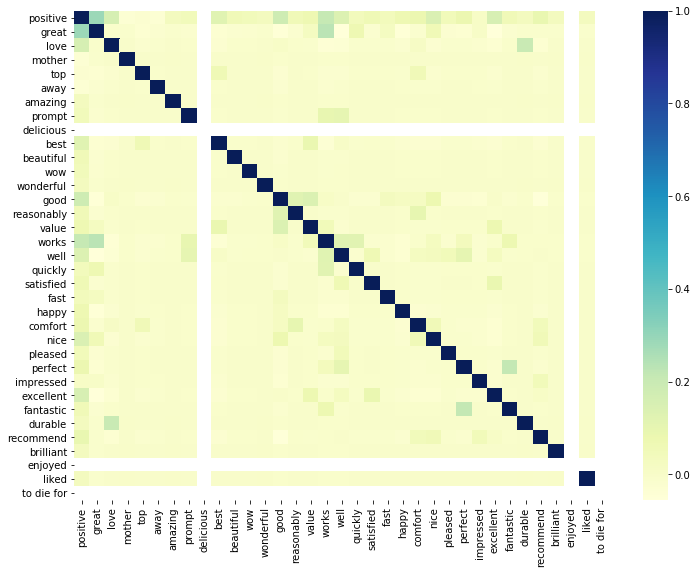

In [211]:
plt.figure(figsize=(12,9))
sns.heatmap(azprod.corr(), cmap='YlGnBu')
plt.show()

In [212]:
data = azprod[keywords]
target = azprod['positive']

In [213]:
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 222


In [214]:
crossv(azprod)

Accuracy per fold:[0.82  0.795 0.745 0.765 0.76 ]
Mean Accuracy and std: 77.70% , 2.69%


For this data, the Bernoulli classifier was the best choice. It out performed the others.
Again, this is not surprising as our outcome data was binary.
To engineer the features, I thought of words that people use as positive descriptors. Since i knew that we needed to apply the model to other data sets, I included keywords that didn't necessarily only apply to restaurants. Some of the keywords showed slight correlation, but the only concerning correlation was between 'mother' and 'impressed'.
Overall, a model that is correct only around 75% is better than no model.

# Revisit Original Model

In [216]:
data_path = 'C:/Users/willd/Desktop/sentances/yelp_labelled.txt'
            
df = pd.read_csv(data_path, delimiter= '\t', header=None)
df.columns = ['review', 'positive']
#remove all punctuation
df['review'] = df['review'].str.replace('[^\s\w]+', '')

In [217]:
#check instances of features
for col in df.loc[:,'great':'to die for']:
    df1=pd.DataFrame(columns=df.columns)
    for col in df1.loc[:,'great':'to die for']:
        df1[col]= df[col].value_counts()
print(df1)

      review positive  great  love  mother  top  away  amazing  prompt  \
False    NaN      NaN    935   964     999  991   995      976     998   
True     NaN      NaN     65    36       1    9     5       24       2   

       delicious     ...      perfect  impressed  excellent  fantastic  \
False        976     ...          985        992        990        988   
True          24     ...           15          8         10         12   

       durable  recommend  brilliant  enjoyed  liked  to die for  
False   1000.0        982     1000.0      995    997         998  
True       NaN         18        NaN        5      3           2  

[2 rows x 36 columns]


In [218]:
#using adjested keywords from evaluating errors
keywords = ['great', 
            'love', 
            'delight',
            'top',
            'away',
            'amazing',
            'amazed',
            'amazes',
            'prompt',
            'delicious',
            'huge',
            'exceeded',
            'exceeds',
            'glad',
            'deal',
            'best',
            'beautiful',
            'wow', 
            'wonderful',
            'good',
            'reasonably',
            'value',
            'works',
            'well',
            'quickly',
            'satisfied',
            'fast',
            'happy',
            'comfort',
            'nice',
            'pleased',
            'perfect',
            'impressed',
            'excellent',
            'fantastic',
            'durable',
            'recommend',
            'brilliant',
            'enjoyed',
            'liked',
            'to die for']

#Capture both the word, plus if its in a pattern


for key in keywords:
    df[str(key)] = df.review.str.contains(
        '' + str(key) + '',
        case=False
    )

In [219]:
#turn binary 'positive' to boolean T/F
df['positive'] = (df['positive'] == 1)

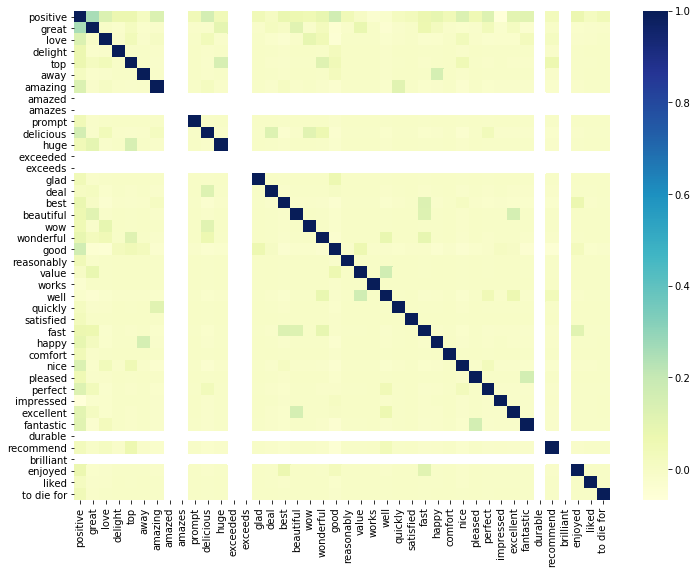

In [220]:
#Creat heatmap for correlation
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), cmap='YlGnBu')
plt.show()

In [221]:
data = df[keywords]
target = df['positive']

In [222]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 239


# Evaluating the model

In [223]:
#Success rate
srate = 100-(239/1000*100)
print('Accuracy of the model:{}%'.format(srate))

Accuracy of the model:76.1%


[[456  44]
 [195 305]]


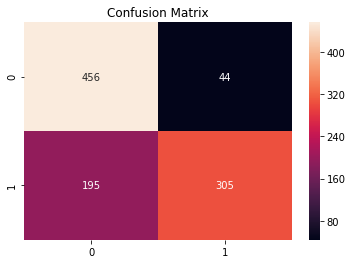

500


In [224]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target, y_pred))

g = sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
print(len(df.loc[df['positive']==True]))

Of 239 the mislabelled points:

44 were reviews that the model identified as positive, but were negative. Type 1 error or false positive

195 of the reviews were false negatives, in otherwords, the model failed to indentify these as positive reviews

In [225]:
#Sensitivity:
sens = (305/500)
spef = (456/500)
print('Sensitivity = {0:.2f}%'.format(sens*100))
print('Specificity = {0:.2f}%'.format(spef*100))

Sensitivity = 61.00%
Specificity = 91.20%


In [226]:
#Examine Type I and Type II errors to ameliorate the success rate
df['y_pred'] = y_pred
errors = df[['review','y_pred','positive']]
type1 = errors.loc[(errors['y_pred']==True)&(errors['positive']==False)]
type2 = errors.loc[(errors['y_pred']==False)&(errors['positive']==True)]

In [227]:
#Look at the false positives
#type1.head(25)

Phrases like "instead of nice", "arent as good", "i do love, but" etc. creates problems for this kinds of model.
Any sort of negation to positive sentiment it flagged as positive.

In [228]:
#Take a look at the false positives.
#type2.head(25)

Examining the false negatives could help in improving the models performance. Some new features can be added based on this case.

# Cross Validation

In [229]:
#Use crossv()
print(crossv(df))


Accuracy per fold:[0.77  0.785 0.77  0.615 0.81 ]
Mean Accuracy and std: 75.00% , 6.91%
None


In [230]:
#Compare to sklearns built in function
from sklearn.model_selection import cross_val_score
cv = cross_val_score(bnb, data, target, cv=10)

print ('Accuracy per fold:{}'.format(cv.round(2)))
print('Mean Accuracy and std: {0:.2f}% , {1:.2f}%'.format((cv.mean()*100),(cv.std()*100)))


Accuracy per fold:[0.74 0.78 0.71 0.81 0.77 0.71 0.77 0.71 0.75 0.79]
Mean Accuracy and std: 75.40% , 3.41%


In [231]:
#Try another distribution
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(data, target)
y_pred = gnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))


Number of mislabeled points out of a total 1000 points : 337


# More results

## IMDB revisted

In [232]:
# Grab and process the raw data.
imdb_path = 'C:/Users/willd/Desktop/sentances/imdb_labelled.txt'
            
imdb = pd.read_csv(imdb_path, delimiter= '\t', header=None)
imdb.columns = ['review', 'positive']
imdb['review'] = imdb['review'].str.replace('[^\w\s]+', '') #remove all punctuation

imdb['positive'] = (imdb['positive'] == 1)

for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(
        '' + str(key) + '',
        case=False
    )
    
data = imdb[keywords]
target = imdb['positive']

bnb.fit(data,target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],(target != y_pred).sum()))

crossv(imdb)

Number of mislabeled points out of a total 748 points : 246
Accuracy per fold:[0.68       0.71333333 0.74666667 0.67785235 0.69127517]
Mean Accuracy and std: 70.18% , 2.57%


## Amazon revisited

In [233]:
az_path = 'C:/Users/willd/Desktop/sentances/amazon_cells_labelled.txt'

azprod = pd.read_csv(az_path, delimiter='\t', header=None)
azprod.columns = ['review','positive']
azprod['review'] = azprod['review'].str.replace('[^\w\s]+', '')
azprod['positive'] = (azprod['positive'] == 1)
for key in keywords:
    azprod[str(key)] = azprod.review.str.contains(
    "" + str(key)+"", case=False)
data = azprod[keywords]
target = azprod['positive']
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],(target != y_pred).sum()))
crossv(azprod)

Number of mislabeled points out of a total 1000 points : 214
Accuracy per fold:[0.82  0.795 0.735 0.775 0.76 ]
Mean Accuracy and std: 77.70% , 2.91%


In [234]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(data, target)

y_pred = gnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 343


In [235]:
#and another
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(data, target)

y_pred = mnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 297


Overall, the Bernoulli had the best results, this isnt suprising as the outcome data in binary.  We can apply this model to other data sets with binary outcomes